In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
from vgg16 import vgg16

In [52]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [53]:
# Parameters
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
BATCH_SIZE = 16

train_dir = '../data/train'
test_dir = '../data/test'

In [54]:
# Creating train and val generator with ImageDataGenerator so can easy divide between
# train and val dataset and add some data augumentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # 20% de las imagenes para test
    # data augumentation
    height_shift_range=0.15,
    width_shift_range=0.15,
    zoom_range=0.2,
    rotation_range=30
)

train_generator = datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    subset='training'
)
val_generator = datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    subset='validation'
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


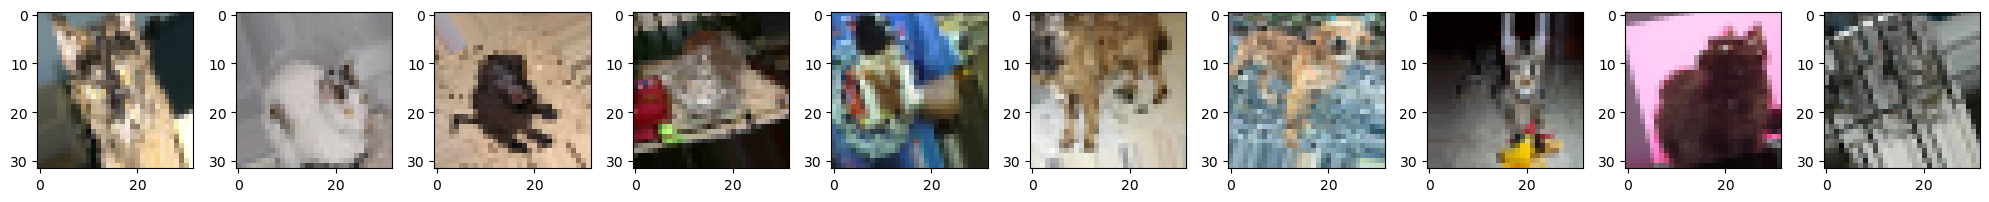

In [55]:
def plot_images(images_array):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_array, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_generator[0][0][i] for i in range(10)]
plot_images(augmented_images)

In [56]:
model = vgg16(2, (IMAGE_WIDTH, IMAGE_HEIGHT, 3))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1E-5),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
EPOCHS = 10

with tf.device('/GPU:0'):
    history = model.fit(train_generator,
                        steps_per_epoch=train_generator.samples // BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=val_generator,
                        validation_steps=val_generator.samples // BATCH_SIZE,
                        verbose=1
                        )


Epoch 1/10


2022-10-22 16:09:47.419881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5409

2022-10-22 16:10:30.151980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 51s 40ms/step - loss: 0.6855 - accuracy: 0.5409 - val_loss: 0.6390 - val_accuracy: 0.6414
Epoch 2/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.6354 - accuracy: 0.6356 - val_loss: 0.6208 - val_accuracy: 0.6466
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.6078 - accuracy: 0.6690 - val_loss: 0.5911 - val_accuracy: 0.6911
Epoch 4/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.5811 - accuracy: 0.6940 - val_loss: 0.5717 - val_accuracy: 0.6987
Epoch 5/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.5690 - accuracy: 0.7012 - val_loss: 0.5486 - val_accuracy: 0.7183
Epoch 6/10
1250/1250 [==============================] - 48s 38ms/step - loss: 0.5533 - accuracy: 0.7125 - val_loss: 0.5522 - val_accuracy: 0.7141
Epoch 7/10
1250/1250 [==============================] - 48s 39ms/step - loss: 0.5398 - accuracy: 0.7263 - val_loss: 0.5419 - val_accura